In [33]:
# add library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline   
import seaborn as sns
import warnings
import matplotlib as mpl
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn import preprocessing 
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from skrebate import ReliefF
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from xgboost.sklearn import XGBClassifier


In [34]:
data_file = './data/GSE66099.csv'
degs_file = './gene_diff_data.csv'
# data pre-processing
norm_filter = MinMaxScaler()

label = 'Died'
num_features = 10

DEGs = pd.read_csv(degs_file)
degs_gene_id = DEGs["X"]

data = pd.read_csv(data_file)
degs_gene_data = data[degs_gene_id]
degs_gene_data.loc[:,"label"]  = data[label]
degs_gene_data

C:\Users\vuduc\anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\vuduc\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,SLC39A8,RHAG,DDIT4,MPO,RRM2,CCL3,TGFBI,MAFF,TYMS,ENPP2,...,FEN1,AURKA,FRAT1,SNRPG,KIF2C,POLE2,UBE2C,AURKB,CENPF,label
0,7.837760,4.112866,8.046405,2.324069,4.759059,3.140721,4.143039,8.578116,5.230842,3.862937,...,4.062130,3.009849,8.785775,9.787393,2.240854,2.622261,4.787508,3.002504,2.246339,1
1,7.751983,1.485795,8.971049,5.258546,7.684430,2.811141,4.977650,4.715507,7.567845,3.212268,...,4.651380,4.084429,8.823993,9.877403,3.083158,2.470562,5.049623,2.667229,3.301098,0
2,10.279053,1.925620,8.712714,1.856427,5.890788,5.947866,4.036440,9.109963,6.066830,3.086101,...,3.554817,2.921564,8.135534,10.673182,2.399208,2.270243,4.136699,3.181530,2.663032,1
3,9.601609,5.888388,8.527441,5.750055,8.206514,5.134266,4.616064,5.156271,8.057016,2.684719,...,5.330526,4.034944,7.884369,9.025149,3.205451,2.998327,5.846744,3.883344,3.662963,1
4,7.785195,4.846312,9.301229,8.695507,10.032503,6.555199,6.542890,8.041716,9.813448,7.125344,...,6.783366,6.314857,8.603358,10.328848,4.966912,4.004817,6.864789,5.244933,4.199692,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,7.181331,2.365467,8.184828,6.181315,7.871825,2.929050,7.998090,4.431776,7.034406,3.780909,...,4.477342,4.055716,8.839066,9.910092,2.871094,3.078237,3.940554,3.216972,3.462929,0
195,5.251613,2.714796,6.427088,3.523980,7.221401,2.154800,4.979873,7.541867,7.252205,2.629904,...,5.162441,3.987030,9.600255,6.991776,2.501947,2.859321,4.154692,3.430309,3.199781,0
196,5.905524,8.074482,6.259182,2.492298,5.146876,1.794615,8.446067,8.769124,4.142922,2.246056,...,4.168839,4.630949,7.698138,9.373841,2.188718,2.145200,4.212061,2.516086,2.280285,0
197,4.786756,2.279402,5.955421,8.199064,8.008226,3.352024,9.477510,5.653967,7.454457,2.954322,...,4.676477,4.053300,8.976000,6.692781,2.799296,2.676570,4.434418,3.215429,3.070606,0


In [35]:
# split data 7/3
from sklearn.model_selection import train_test_split

# y = degs_gene_data.iloc[:,108].values
X, y = degs_gene_data.iloc[:,0:108].values, degs_gene_data.iloc[:,108].values


In [36]:
X[:,0]

array([ 7.83775973,  7.75198314, 10.27905306,  9.60160927,  7.78519525,
        5.14753555,  7.14121395, 11.38452663,  8.26078177,  6.22483544,
        6.46213086,  7.79898583,  4.20774828,  7.07662203,  3.93496862,
        6.60139579,  3.97741554,  6.49158695,  8.16663839,  9.07082746,
        5.01822753,  8.25139113,  6.27991797,  9.44387897,  8.43953965,
        6.67005359,  8.2200189 ,  9.72462787,  7.56828044,  6.6055124 ,
        7.65395323,  5.93015729,  7.287119  ,  3.26349989,  8.1171794 ,
        4.62516107,  4.11643358,  3.59600687,  8.07753005,  6.01667048,
        7.04779533,  8.38746683,  7.79722778,  5.72060779,  6.28258969,
        7.2374142 ,  6.49645489,  3.61215667,  5.97706047,  3.84253424,
        9.66056183,  3.00023329,  4.58147715,  8.71223199,  7.74541413,
        5.02613673,  6.83645476,  5.73876807,  5.89086525,  6.73654376,
        4.76253428,  9.6712716 ,  4.0463812 ,  7.44242834,  7.45057279,
        7.41139449,  6.0985281 ,  5.41118317,  6.05895461,  6.65

In [37]:
# normalize data:
def nml(gene_data):
    normalize_data = (gene_data - min(gene_data))/(max(gene_data) - min(gene_data))
    return normalize_data
for i in range(108):
    X[:,i] = nml(X[:,i])

In [38]:
X[:,0].shape

(199,)

In [39]:
y

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0], dtype=int64)

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state=1234,
                                                   shuffle=True, stratify=y)

In [45]:
from sklearn import metrics

rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)

print('Training accuracy:', np.mean(rf.predict(X_train) == y_train)*100)
print('Test accuracy:', np.mean(rf.predict(X_test) == y_test)*100)

Training accuracy: 100.0
Test accuracy: 90.0


In [46]:
def evaluate(y_pred, y_test):
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    for i in range(len(y_test)):
        if (y_pred[i]==1 and y_test[i]==1):
            tp = tp + 1
        elif (y_pred[i]==0 and y_test[i]==0):
            tn = tn + 1
        elif (y_pred[i]==1 and y_test[i]==0):
            fp = fp + 1
        else:
            fn = fn + 1
    sn = tp/(tp+fn)
    sp = tn/(tn+fp)
    fpr = fp/(tn+fp)
    acc = (tp+tn)/(tp+fp+tn+fn)
    M = {
        "sn":sn,
        "sp":sp,
        "acc":acc,
        "tp":tp,
        "tn":tn,
        "fp":fp,
        "fn":fn,
        "fpr":fpr
    }
    return M   
      
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = rf.predict(X_test)
metric = evaluate(y_pred, y_test)


In [47]:
metric

{'sn': 0.42857142857142855,
 'sp': 0.9767441860465116,
 'acc': 0.9,
 'tp': 6,
 'tn': 84,
 'fp': 2,
 'fn': 8,
 'fpr': 0.023255813953488372}

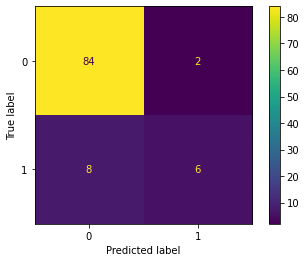

In [48]:
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

# Genetic Algorithms

In [ ]:
import random
import numpy as np
from sklearn import datasets, linear_model
from genetic_selection import GeneticSelectionCV

#     random.seed(42)
#     np.random.seed(42)

#     iris = datasets.load_iris()

    # Some noisy data not correlated
#     E = np.random.uniform(0, 0.1, size=(len(iris.data), 20))

#     X = np.hstack((iris.data, E))
#     y = iris.target
#     estimator = linear_model.LogisticRegression(solver="liblinear", multi_class="ovr")
def genetic():
    X = X_train
    y = y_train
#     estimator = LogisticRegression(penalty="l2", random_state=0)
    estimator = RandomForestClassifier(n_estimators=100, random_state=0)
    
    selector = GeneticSelectionCV(
        estimator,
        cv=5,
        verbose=1,
        scoring="accuracy",
        max_features=50,
        n_population=100,
        crossover_proba=0.3,
        mutation_proba=0.1,
        n_generations=50,
        crossover_independent_proba=0.5,
        mutation_independent_proba=0.05,
        tournament_size=3,
#         n_gen_no_change=10,
        caching=True,
        n_jobs=-1,
    )
    selector = selector.fit(X_train, y_train)
    arr = selector.support_
    return arr

# loop 100 interation get feature
total = []
for i in range(100):
    a = genetic()
    total.append(a*1)

Selecting features with genetic algorithm.
gen	nevals	avg                               	std                               	min                            	max                               
0  	100   	[  0.872363  25.31       0.042997]	[  0.02901   14.723244   0.012461]	[ 0.726316  1.        0.017895]	[  0.919474  50.         0.070345]
1  	29    	[-99.121379  29.78     100.044841]	[ 995.075742   13.933112  994.98293 ]	[-10000.           4.           0.01958]	[     0.929474     51.        10000.      ]
2  	32    	[  0.894258  31.45       0.04635 ]	[  0.014986  12.677835   0.010777]   	[ 0.848947  4.        0.01958 ]         	[  0.929474  49.         0.070345]         
3  	35    	[-299.124174   35.        300.045488]	[ 1706.026237    11.355175  1705.864211]	[-10000.           4.           0.01958]	[     0.929474     55.        10000.      ]
4  	39    	[-99.100195  37.83     100.045047]   	[ 995.077871    8.001319  994.98291 ]   	[-10000.          10.           0.01958]	[     0.929474   

46 	35    	[  0.927426  22.61       0.050711]   	[ 0.005595  1.340858  0.002958]         	[  0.898947  21.         0.031693]      	[  0.929474  29.         0.067598]         
47 	47    	[  0.928258  22.45       0.050355]   	[ 0.004612  1.47902   0.002239]         	[  0.898947  22.         0.039617]      	[  0.929474  30.         0.054813]         
48 	34    	[  0.928242  22.24       0.050587]   	[ 0.004642  1.030728  0.001982]         	[  0.908947  22.         0.037756]      	[  0.929474  30.         0.057957]         
49 	39    	[  0.926932  22.35       0.050421]   	[ 0.006938  1.444818  0.003544]         	[  0.898947  20.         0.031693]      	[  0.929474  32.         0.066023]         
50 	41    	[  0.927753  22.32       0.050764]   	[ 0.005735  1.263962  0.002445]         	[  0.898947  19.         0.036865]      	[  0.929474  28.         0.066524]         
Selecting features with genetic algorithm.
gen	nevals	avg                               	std                               	m

43 	41    	[  0.926137  25.43       0.03994 ]	[ 0.010218  1.328571  0.003867]      	[  0.868947  24.         0.023713]      	[  0.929474  31.         0.059509]         
44 	35    	[  0.926063  25.4        0.040957]	[ 0.009534  1.264911  0.005673]      	[  0.879474  24.         0.030797]      	[  0.929474  31.         0.070345]         
45 	38    	[  0.927568  25.2        0.040739]	[ 0.006602  0.883176  0.004589]      	[  0.889474  24.         0.030797]      	[  0.929474  30.         0.066023]         
46 	51    	[  0.926853  25.46       0.040937]	[ 0.007893  1.465742  0.00467 ]      	[  0.888947  25.         0.036865]      	[  0.929474  33.         0.066023]         
47 	42    	[  0.925837  25.4        0.039843]	[ 0.010461  1.414214  0.002886]      	[  0.878947  24.         0.031693]      	[  0.929474  32.         0.0543  ]         
48 	37    	[  0.926253  25.39       0.040154]	[ 0.008049  1.240121  0.003829]      	[  0.888947  24.         0.020627]      	[  0.929474  31.         0.057

39 	32    	[  0.938068  23.18       0.037952]	[ 0.005678  0.804736  0.002747]      	[  0.899474  23.         0.037291]         	[  0.939474  28.         0.051445]         
40 	29    	[  0.936958  23.26       0.038063]	[ 0.00823   1.064143  0.003609]      	[  0.898947  22.         0.031693]         	[  0.939474  29.         0.057957]         
41 	33    	[  0.937463  23.24       0.037681]	[ 0.008173  1.141227  0.003118]      	[  0.898947  23.         0.030797]         	[  0.939474  31.         0.057957]         
42 	27    	[  0.938168  23.12       0.037758]	[ 0.005959  0.863481  0.004039]      	[  0.899474  22.         0.023865]         	[  0.939474  31.         0.070345]         
43 	32    	[  0.936958  23.23       0.037448]	[ 0.008828  0.822861  0.003042]      	[  0.888947  23.         0.020627]         	[  0.939474  27.         0.057957]         
44 	38    	[  0.936258  23.32       0.037842]	[ 0.010627  1.199     0.003299]      	[  0.878947  23.         0.023713]         	[  0.939474 

34 	38    	[  0.926016  27.48       0.026738]   	[ 0.009106  1.47973   0.007097]         	[  0.888947  27.         0.024084]         	[  0.929474  35.         0.054813]         
35 	40    	[  0.926216  27.21       0.026298]   	[ 0.009838  1.08899   0.007028]         	[  0.888947  25.         0.020627]         	[  0.929474  36.         0.058167]         
36 	23    	[  0.927842  27.18       0.025124]   	[ 0.006398  0.920652  0.003848]         	[  0.888947  27.         0.024084]         	[  0.929474  34.         0.044771]         
37 	40    	[  0.926621  27.28       0.025944]   	[ 0.008766  1.096175  0.005987]         	[  0.888947  25.         0.024084]         	[  0.929474  33.         0.058528]         
38 	40    	[  0.925632  27.27       0.026251]   	[ 0.010089  1.279492  0.00595 ]         	[  0.888947  25.         0.024084]         	[  0.929474  35.         0.059746]         
39 	33    	[  0.927437  27.02       0.025341]   	[ 0.00734   0.824379  0.004889]         	[  0.888947  24.    

29 	30    	[  0.937274  18.32       0.037372]   	[ 0.008669  1.13031   0.002751]         	[  0.879474  18.         0.018947]         	[  0.939474  24.         0.050794]         
30 	37    	[  0.937174  18.32       0.037995]   	[ 0.008585  1.165161  0.003815]         	[  0.889474  18.         0.024084]         	[  0.939474  23.         0.057957]         
31 	39    	[  0.935158  18.78       0.038426]   	[ 0.0112    1.879255  0.006118]         	[  0.898947  18.         0.018947]         	[  0.949474  26.         0.066524]         
32 	52    	[  0.932458  19.17       0.038879]   	[ 0.015551  2.553644  0.00579 ]         	[  0.869474  17.         0.020627]         	[  0.949474  28.         0.066023]         
33 	38    	[  0.935263  19.19       0.038456]   	[ 0.012203  2.625624  0.004312]         	[  0.889474  16.         0.023865]         	[  0.949474  28.         0.050794]         
34 	35    	[  0.937558  20.         0.039342]   	[ 0.011247  3.295451  0.004537]         	[  0.889474  18.    

24 	33    	[  0.926032  36.69       0.041253]   	[ 0.0076    1.507946  0.00511 ]         	[  0.898947  35.         0.031693]      	[  0.929474  44.         0.066023]         
25 	33    	[  0.925532  35.96       0.040799]   	[ 0.008903  1.462327  0.003547]         	[  0.889474  34.         0.031693]      	[  0.929474  46.         0.054813]         
26 	44    	[  0.925142  35.7        0.041154]   	[ 0.008451  1.627882  0.005473]         	[  0.898947  34.         0.023865]      	[  0.929474  43.         0.070345]         
27 	26    	[  0.927363  35.07       0.040149]   	[ 0.006869  0.604235  0.002654]         	[  0.888947  34.         0.036865]      	[  0.929474  40.         0.057957]         
28 	26    	[  0.928153  35.26       0.040424]   	[ 0.004668  0.890169  0.002751]         	[  0.899474  35.         0.03975 ]      	[  0.929474  40.         0.057957]         
29 	41    	[  0.928263  35.05       0.039976]   	[ 0.004354  0.698212  0.003744]         	[  0.908947  31.         0.020627] 

19 	30    	[  0.933963  38.62       0.057608]   	[ 0.012629  1.592357  0.004825]         	[  0.879474  34.         0.031693]         	[  0.939474  45.         0.073205]         
20 	30    	[  0.934663  38.16       0.058201]   	[ 0.010469  1.376372  0.004626]         	[  0.898947  35.         0.036865]         	[  0.939474  44.         0.070345]         
21 	39    	[  0.934674  37.52       0.057482]   	[ 0.010342  1.36      0.00503 ]         	[  0.889474  34.         0.036865]         	[  0.939474  44.         0.073205]         
22 	33    	[  0.935374  37.21       0.057351]   	[ 0.009808  0.930537  0.004136]         	[  0.899474  35.         0.036865]         	[  0.939474  42.         0.067598]         
23 	45    	[  0.936574  37.24       0.057223]   	[ 0.00816   0.826075  0.003874]         	[  0.899474  37.         0.036865]         	[  0.939474  42.         0.070345]         
24 	29    	[  0.937268  37.13       0.058029]   	[ 0.007718  0.923634  0.001868]         	[  0.898947  33.    

14 	37    	[  0.925258  21.16       0.051664]	[ 0.009004  2.560156  0.003498]      	[  0.889474  19.         0.036578]         	[  0.929474  34.         0.059746]         
15 	39    	[  0.928374  20.34       0.051045]	[ 0.004449  1.457532  0.001829]      	[  0.899474  20.         0.044142]         	[  0.929474  32.         0.059746]         
16 	34    	[  0.928074  20.28       0.050643]	[ 0.005295  1.357056  0.002799]      	[  0.899474  19.         0.030797]         	[  0.929474  29.         0.059746]         
17 	30    	[  0.927368  20.26       0.051378]	[ 0.006394  1.110135  0.002165]      	[  0.898947  17.         0.04857 ]         	[  0.929474  26.         0.062837]         
18 	43    	[  0.925863  20.43       0.050966]	[ 0.008468  1.298114  0.00343 ]      	[  0.888947  18.         0.031693]         	[  0.929474  26.         0.059746]         
19 	37    	[  0.927468  20.4        0.051126]	[ 0.006025  1.319091  0.002165]      	[  0.898947  20.         0.044142]         	[  0.929474 

11 	41    	[  0.925832  21.58       0.050453]	[ 0.012893  1.484453  0.004929]   	[  0.868947  20.         0.030797]	[  0.939474  28.         0.067545]
12 	34    	[  0.927347  21.64       0.051052]	[ 0.011597  1.396567  0.006155]   	[  0.878947  18.         0.023713]	[  0.939474  27.         0.073205]
13 	42    	[  0.925111  22.31       0.0508  ]	[ 0.015701  2.01343   0.008535]   	[  0.878947  16.         0.023713]	[  0.939474  29.         0.070345]
14 	35    	[  0.928221  22.52       0.051679]	[ 0.014054  1.774711  0.00835 ]   	[  0.878947  19.         0.01958 ]	[  0.939474  33.         0.058528]
15 	35    	[  0.932468  23.06       0.053861]	[ 0.012302  1.832048  0.007263]   	[  0.879474  19.         0.030797]	[  0.939474  33.         0.058229]
16 	36    	[  0.937074  23.27       0.056321]	[ 0.007088  0.822861  0.005653]   	[  0.909474  23.         0.036865]	[  0.939474  27.         0.058229]
17 	42    	[  0.936768  23.48       0.056401]	[ 0.007874  1.486472  0.005412]   	[  0.899474  

14 	39    	[  0.928721  24.         0.051965]	[ 0.009075  1.606238  0.004667]   	[  0.878947  19.         0.037756]	[  0.939474  30.         0.059746]
15 	36    	[  0.930816  24.21       0.052928]	[ 0.009172  1.282926  0.006313]   	[  0.908947  22.         0.036865]	[  0.939474  28.         0.067598]
16 	30    	[  0.934842  25.08       0.057023]	[ 0.010112  1.02645   0.003785]   	[  0.898947  23.         0.039617]	[  0.939474  29.         0.066023]
17 	37    	[  0.937253  25.05       0.057296]	[ 0.006945  0.71239   0.003493]   	[  0.898947  22.         0.036865]	[  0.939474  29.         0.066524]
18 	47    	[  0.936474  25.48       0.058205]	[ 0.008544  1.3891    0.002754]   	[  0.899474  25.         0.050691]	[  0.939474  33.         0.073205]
19 	25    	[  0.937863  25.24       0.05773 ]	[ 0.005817  0.838093  0.003118]   	[  0.909474  25.         0.036865]	[  0.939474  30.         0.073205]
20 	47    	[  0.935158  25.66       0.057521]	[ 0.010909  1.674634  0.003426]   	[  0.879474  

14 	33    	[  0.925542  42.06       0.051031]   	[ 0.010934  0.675574  0.004587]         	[  0.869474  40.         0.01958 ]         	[  0.929474  46.         0.066023]         
15 	37    	[  0.926253  41.89       0.050626]   	[ 0.011015  1.00891   0.002735]         	[  0.868947  35.         0.031693]         	[  0.929474  46.         0.066023]         
16 	41    	[  0.927347  42.07       0.050419]   	[ 0.008625  0.710704  0.00472 ]         	[  0.878947  39.         0.01958 ]         	[  0.929474  46.         0.070345]         
17 	33    	[  0.925942  42.24       0.050417]   	[ 0.010907  0.970773  0.004829]         	[  0.858947  40.         0.031693]         	[  0.929474  46.         0.066023]         
18 	36    	[  0.926758  42.06       0.050534]   	[ 0.010344  0.745922  0.002961]         	[  0.868947  39.         0.036865]         	[  0.929474  48.         0.070345]         
19 	39    	[  0.925347  42.3        0.050629]   	[ 0.011589  1.144552  0.004062]         	[  0.868947  40.    

9  	37    	[  0.927658  21.47       0.062279]   	[ 0.011638  1.664061  0.008445]         	[  0.879474  16.         0.036578]         	[  0.939474  29.         0.0747  ]         
10 	35    	[  0.930242  21.15       0.057986]   	[ 0.011615  1.203121  0.008961]         	[  0.898947  18.         0.018947]         	[  0.939474  26.         0.0747  ]         
11 	39    	[  0.935447  21.18       0.058183]   	[ 0.009235  0.829216  0.00588 ]         	[  0.888947  19.         0.037194]         	[  0.939474  26.         0.0747  ]         
12 	38    	[  0.937368  21.3        0.057266]   	[ 0.006992  1.044031  0.004438]         	[  0.899474  21.         0.036865]         	[  0.939474  26.         0.067676]         
13 	37    	[  0.936053  21.36       0.056947]   	[ 0.011484  1.307823  0.005137]         	[  0.888947  21.         0.01958 ]         	[  0.939474  29.         0.058229]         
14 	39    	[  0.935653  21.44       0.0565  ]   	[ 0.011709  1.409397  0.00553 ]         	[  0.879474  21.    

4  	27    	[  0.904916  27.64       0.043548]	[  0.011655  10.20443    0.012223]	[ 0.868947  8.        0.01958 ]	[  0.919474  47.         0.070742]
5  	43    	[  0.906753  27.53       0.044329]	[ 0.011873  8.576077  0.01166 ]   	[  0.858947  13.         0.01958 ]	[  0.919474  41.         0.081008]
6  	44    	[  0.908747  31.48       0.047938]	[ 0.013513  7.664829  0.011445]   	[  0.858947  16.         0.017895]	[  0.929474  45.         0.073061]
7  	41    	[  0.912005  33.88       0.050197]	[ 0.011843  7.021795  0.010385]   	[  0.878947  16.         0.01958 ]	[  0.929474  42.         0.063281]
8  	25    	[  0.916784  36.44       0.054067]	[ 0.009898  4.546031  0.008092]   	[  0.878947  16.         0.020627]	[  0.929474  43.         0.059746]
9  	40    	[  0.916811  35.93       0.052119]	[ 0.010488  4.140664  0.009306]   	[  0.878947  27.         0.020627]	[  0.929474  43.         0.059746]
10 	19    	[  0.918526  33.52       0.050272]	[ 0.011957  4.644308  0.008085]   	[  0.868947  27.

7  	32    	[  0.915426  38.46       0.048904]	[ 0.01219   8.073933  0.00926 ]   	[  0.868947  15.         0.023865]	[  0.939474  46.         0.074347]
8  	56    	[  0.912268  33.49       0.045865]	[ 0.01457   9.711328  0.011344]   	[  0.868947  15.         0.002105]	[  0.939474  48.         0.070345]
9  	27    	[-99.089368  30.73     100.045549]	[ 995.078959   10.183177  994.982859]	[-10000.           15.            0.018947]	[     0.939474     51.        10000.      ]
10 	34    	[  0.920289  23.84       0.041773]	[ 0.014541  8.048254  0.013594]      	[  0.878947  15.         0.01958 ]         	[  0.939474  46.         0.066524]         
11 	32    	[  0.925016  20.89       0.040736]	[ 0.012784  5.707705  0.014364]      	[  0.888947  14.         0.020627]         	[  0.939474  40.         0.063281]         
12 	33    	[  0.926511  19.28       0.04353 ]	[ 0.015418  2.470142  0.015659]      	[  0.868947  14.         0.002105]         	[  0.939474  32.         0.066207]         
13 	42    

4  	32    	[  0.906168  24.14       0.049163]	[ 0.010828  5.29154   0.012395]   	[  0.858947  13.         0.031693]	[  0.918947  39.         0.085662]
5  	37    	[  0.908863  23.39       0.048425]	[ 0.009462  5.045582  0.011332]   	[  0.868947  13.         0.031693]	[  0.919474  35.         0.086841]
6  	28    	[  0.911205  24.82       0.050522]	[ 0.011276  5.342995  0.010128]   	[  0.868947  13.         0.031693]	[  0.929474  35.         0.081008]
7  	40    	[  0.914747  25.28       0.048283]	[ 0.011123  4.905262  0.007178]   	[  0.868947  18.         0.023713]	[  0.929474  36.         0.066524]
8  	43    	[  0.916937  24.88       0.04884 ]	[ 0.01068   4.250365  0.007282]   	[  0.878947  18.         0.023713]	[  0.929474  36.         0.066524]
9  	34    	[  0.921258  25.04       0.048842]	[ 0.010779  4.159135  0.006525]   	[  0.878947  19.         0.023713]	[  0.929474  36.         0.062837]
10 	37    	[  0.924426  23.36       0.050638]	[ 0.008381  2.674023  0.005725]   	[  0.889474  

6  	41    	[  0.917784  25.81       0.050229]	[ 0.010942  9.860725  0.009974]      	[  0.888947  11.         0.030797]         	[  0.929474  41.         0.067598]         
7  	44    	[  0.921242  30.04       0.048865]	[ 0.011803  7.769067  0.007336]      	[  0.879474  11.         0.030797]         	[  0.929474  43.         0.070345]         
8  	42    	[  0.921179  32.26       0.047665]	[ 0.01363   5.354662  0.007261]      	[  0.868947  12.         0.01958 ]         	[  0.929474  38.         0.066023]         
9  	32    	[  0.924432  31.47       0.049399]	[ 0.009998  4.053283  0.005119]      	[  0.879474  21.         0.031693]         	[  0.929474  38.         0.070345]         
10 	36    	[  0.924811  28.36       0.048641]	[ 0.009618  2.334609  0.005621]      	[  0.879474  22.         0.030797]         	[  0.929474  36.         0.063281]         
11 	40    	[  0.922879  27.45       0.049417]	[ 0.01113   2.303801  0.005882]      	[  0.868947  23.         0.031693]         	[  0.929474 

2  	26    	[  0.902932  32.72       0.044877]	[  0.014758  11.600069   0.01074 ]   	[ 0.848947  8.        0.023265]            	[  0.929474  49.         0.080878]         
3  	26    	[  0.910695  33.27       0.049009]	[  0.012801  10.64505    0.009151]   	[  0.868947  11.         0.023713]         	[  0.929474  49.         0.070345]         
4  	48    	[  0.915163  34.58       0.050258]	[ 0.013338  8.985744  0.009101]      	[  0.878947  11.         0.01958 ]         	[  0.929474  50.         0.070345]         
5  	38    	[  0.919737  33.68       0.050861]	[ 0.011544  8.03104   0.007992]      	[  0.878947  11.         0.031693]         	[  0.929474  49.         0.070742]         
6  	35    	[  0.922826  33.11       0.049318]	[ 0.009981  7.407962  0.007139]      	[  0.888947  11.         0.01958 ]         	[  0.929474  45.         0.067598]         
7  	32    	[  0.924747  32.13       0.050017]	[ 0.008816  7.07058   0.004977]      	[  0.889474  17.         0.031693]         	[  0.929474 

50 	28    	[  0.937558  26.2        0.057674]	[ 0.008037  1.019804  0.003732]      	[  0.888947  25.         0.036865]         	[  0.939474  33.         0.067598]         
Selecting features with genetic algorithm.
gen	nevals	avg                               	std                               	min                            	max                               
0  	100   	[  0.873353  25.7        0.042384]	[  0.01946   14.045284   0.013389]	[ 0.808947  2.        0.017895]	[  0.909474  50.         0.084941]
1  	36    	[-99.122879  27.02     100.041897]	[ 995.075591   12.395951  994.983226]	[-10000.           2.           0.01958]	[     0.918947     51.        10000.      ]
2  	33    	[  0.892679  26.82       0.042339]	[  0.013414  12.409174   0.012269]   	[ 0.858421  4.        0.01958 ]         	[  0.918947  49.         0.081008]         
3  	23    	[  0.901779  29.83       0.041042]	[  0.010347  13.544043   0.01006 ]   	[ 0.868947  7.        0.01958 ]         	[  0.919474  50.         0

45 	32    	[  0.936542  32.28       0.057178]   	[ 0.009728  0.980612  0.004222]         	[  0.888947  32.         0.031693]         	[  0.939474  37.         0.058229]         
46 	37    	[  0.936132  32.27       0.056786]   	[ 0.010211  0.988484  0.004891]         	[  0.879474  31.         0.031693]         	[  0.939474  38.         0.058528]         
47 	34    	[  0.936642  32.19       0.05712 ]   	[ 0.009285  0.945463  0.004537]         	[  0.898947  29.         0.031693]         	[  0.939474  38.         0.063281]         
48 	45    	[  0.935921  32.3        0.056989]   	[ 0.009552  1.053565  0.004484]         	[  0.898947  31.         0.037756]         	[  0.939474  37.         0.070345]         
49 	46    	[  0.935221  32.3        0.057074]   	[ 0.012403  1.284523  0.004757]         	[  0.868947  29.         0.031693]         	[  0.939474  40.         0.066524]         
50 	39    	[  0.937342  32.15       0.057445]   	[ 0.007359  0.572276  0.002943]         	[  0.908947  32.    

40 	33    	[  0.925421  32.16       0.050496]   	[ 0.01155   0.924338  0.004998]         	[  0.878947  30.         0.01958 ]         	[  0.929474  40.         0.070345]         
41 	32    	[  0.927037  32.12       0.050546]   	[ 0.009198  0.534416  0.003496]         	[  0.888947  32.         0.01958 ]         	[  0.929474  35.         0.066207]         
42 	35    	[  0.925226  32.3        0.050527]   	[ 0.01229   1.090871  0.003667]         	[  0.868947  32.         0.031693]         	[  0.929474  38.         0.066207]         
43 	31    	[  0.927237  32.16       0.050755]   	[ 0.007274  0.88      0.003453]         	[  0.898947  31.         0.031693]         	[  0.929474  38.         0.066023]         
44 	37    	[  0.923316  32.48       0.050846]   	[ 0.015422  1.486472  0.003636]         	[  0.868947  31.         0.037194]         	[  0.929474  39.         0.067545]         
45 	33    	[  0.922511  32.22       0.050179]   	[ 0.016056  1.237578  0.005302]         	[  0.868947  28.    

41 	42    	[  0.924932  26.27       0.049994]	[ 0.012702  1.05693   0.003999]   	[  0.878947  25.         0.023713]	[  0.929474  32.         0.058528]
42 	40    	[  0.927947  26.14       0.050729]	[ 0.006477  0.648383  0.003186]   	[  0.888947  26.         0.031693]	[  0.929474  31.         0.068166]
43 	45    	[  0.925532  26.34       0.049806]	[ 0.012532  1.38      0.005356]   	[  0.878947  23.         0.023713]	[  0.929474  33.         0.059746]
44 	38    	[  0.924226  26.3        0.050075]	[ 0.013863  1.004988  0.005222]   	[  0.868947  24.         0.023265]	[  0.929474  31.         0.067545]
45 	24    	[  0.925737  26.22       0.050279]	[ 0.012088  0.855336  0.004612]   	[  0.868947  26.         0.023265]	[  0.929474  32.         0.062837]
46 	29    	[  0.926237  26.17       0.050466]	[ 0.010196  0.664154  0.00368 ]   	[  0.878947  26.         0.023713]	[  0.929474  29.         0.058528]
47 	42    	[  0.924932  26.29       0.050368]	[ 0.013025  0.951788  0.003176]   	[  0.858947  

38 	48    	[  0.926332  16.56       0.050446]	[ 0.01029   1.823842  0.003777]      	[  0.878947  16.         0.036578]         	[  0.929474  24.         0.070742]         
39 	31    	[  0.928663  16.15       0.050617]	[ 0.004228  0.804674  0.002899]      	[  0.898947  15.         0.031693]         	[  0.929474  21.         0.067598]         
40 	33    	[  0.927542  16.43       0.050202]	[ 0.006531  1.464616  0.003956]      	[  0.898947  16.         0.030797]         	[  0.929474  25.         0.067598]         
41 	25    	[  0.927132  16.38       0.05062 ]	[ 0.008339  1.255229  0.003207]      	[  0.878947  16.         0.031693]         	[  0.929474  23.         0.066524]         
42 	36    	[  0.926511  16.47       0.050195]	[ 0.008531  1.299654  0.003932]      	[  0.888947  16.         0.031693]         	[  0.939474  22.         0.060561]         
43 	47    	[  0.926242  16.5        0.050449]	[ 0.009324  1.459452  0.004628]      	[  0.888947  16.         0.036578]         	[  0.939474 

33 	44    	[  0.915647  13.65       0.025035]   	[ 0.011286  1.9046    0.004755]         	[  0.868947  13.         0.018947]         	[  0.919474  22.         0.050691]         
34 	38    	[  0.915147  13.54       0.024891]   	[ 0.011059  1.506121  0.00391 ]         	[  0.868947  11.         0.018947]         	[  0.919474  19.         0.039259]         
35 	30    	[  0.916442  13.46       0.024332]   	[ 0.008497  1.410106  0.004194]         	[  0.879474  12.         0.002105]         	[  0.919474  19.         0.044142]         
36 	40    	[  0.915337  13.56       0.024614]   	[ 0.011877  1.531796  0.003947]         	[  0.868947  13.         0.018947]         	[  0.919474  19.         0.050619]         
37 	35    	[  0.918368  13.26       0.024405]   	[ 0.005675  1.439583  0.00302 ]         	[  0.878947  13.         0.023865]         	[  0.919474  23.         0.048352]         
38 	28    	[  0.916463  13.26       0.025294]   	[ 0.009878  0.965609  0.005611]         	[  0.869474  12.    

32 	43    	[  0.916942  18.52       0.049115]	[ 0.007361  1.499867  0.005804]   	[  0.888947  18.         0.01958 ]	[  0.919474  26.         0.070345]
33 	46    	[  0.916247  18.7        0.04877 ]	[ 0.008524  1.835756  0.00604 ]   	[  0.869474  18.         0.018947]	[  0.919474  28.         0.054813]
34 	30    	[  0.917647  18.41       0.049198]	[ 0.00646   1.556245  0.005293]   	[  0.878947  18.         0.01958 ]	[  0.919474  29.         0.050691]
35 	50    	[  0.916137  18.51       0.04824 ]	[ 0.008938  1.396388  0.007093]   	[  0.868947  18.         0.01958 ]	[  0.919474  27.         0.067389]
36 	46    	[  0.917758  18.55       0.048775]	[ 0.006246  1.862122  0.006486]   	[  0.888947  18.         0.01958 ]	[  0.919474  27.         0.057957]
37 	36    	[  0.917758  18.88       0.048169]	[ 0.006558  2.530929  0.007542]   	[  0.878947  18.         0.01958 ]	[  0.919474  28.         0.057957]
38 	38    	[  0.917668  19.49       0.04719 ]	[ 0.006088  3.229536  0.008557]   	[  0.888947  

35 	44    	[  0.933421  17.17       0.056788]	[ 0.011118  1.970051  0.004353]   	[  0.879474  15.         0.039082]	[  0.939474  23.         0.067676]
36 	36    	[  0.935937  16.19       0.057993]	[ 0.009181  1.836818  0.002969]   	[  0.888947  14.         0.050691]	[  0.939474  23.         0.0747  ]
37 	39    	[  0.935937  15.51       0.057416]	[ 0.010036  1.17894   0.003   ]   	[  0.878947  14.         0.039526]	[  0.939474  21.         0.060561]
38 	27    	[  0.938268  15.3        0.058621]	[ 0.005173  0.964365  0.00342 ]   	[  0.899474  15.         0.050794]	[  0.939474  20.         0.081053]
39 	40    	[  0.937463  15.36       0.058274]	[ 0.006363  1.330564  0.003162]   	[  0.908947  14.         0.050691]	[  0.939474  24.         0.075143]
40 	36    	[  0.935958  15.44       0.057659]	[ 0.01173   1.444438  0.00451 ]   	[  0.879474  14.         0.030797]	[  0.939474  22.         0.080792]
41 	47    	[  0.935647  15.65       0.057332]	[ 0.009314  1.620957  0.004147]   	[  0.898947  

38 	34    	[  0.916942  19.43       0.024912]	[ 0.007195  1.505025  0.005267]   	[  0.888947  18.         0.002105]	[  0.919474  27.         0.050691]
39 	50    	[  0.917863  19.3        0.025087]	[ 0.005083  1.118034  0.003951]   	[  0.898947  17.         0.023865]	[  0.919474  24.         0.050691]
40 	44    	[  0.916647  19.47       0.025222]	[ 0.007562  1.59659   0.005579]   	[  0.879474  17.         0.018947]	[  0.919474  28.         0.050273]
41 	40    	[  0.917453  19.33       0.024949]	[ 0.005888  1.371532  0.005415]   	[  0.888947  17.         0.002105]	[  0.929474  25.         0.050691]
42 	27    	[  0.917853  18.97       0.02638 ]	[ 0.007234  1.178601  0.007354]   	[  0.878947  17.         0.018947]	[  0.929474  24.         0.057957]
43 	36    	[  0.917847  18.81       0.026174]	[ 0.006505  1.836818  0.006757]   	[  0.878947  17.         0.002105]	[  0.929474  28.         0.050691]
44 	31    	[  0.916311  18.47       0.027421]	[ 0.010396  2.197521  0.007384]   	[  0.878947  

36 	36    	[  0.923505  35.78       0.050786]	[ 0.012318  1.432341  0.005267]      	[  0.878947  33.         0.023713]         	[  0.929474  42.         0.066524]         
37 	36    	[  0.923516  35.33       0.050342]	[ 0.01222   1.470068  0.004839]      	[  0.888947  33.         0.036865]         	[  0.929474  43.         0.066207]         
38 	39    	[  0.925626  34.87       0.050435]	[ 0.00978   1.585276  0.004225]      	[  0.878947  33.         0.031693]         	[  0.929474  43.         0.066207]         
39 	46    	[  0.925332  34.34       0.052076]	[ 0.010098  0.982039  0.004763]      	[  0.888947  32.         0.039617]         	[  0.929474  38.         0.073061]         
40 	35    	[  0.927963  34.07       0.050625]	[ 0.006431  0.777882  0.002955]      	[  0.889474  32.         0.031693]         	[  0.929474  38.         0.066023]         
41 	33    	[  0.926947  34.03       0.050221]	[ 0.008013  0.780449  0.003752]      	[  0.888947  33.         0.031693]         	[  0.929474 

33 	45    	[  0.936268  30.37       0.057223]	[ 0.010102  1.308854  0.004173]      	[  0.879474  30.         0.036865]      	[  0.939474  38.         0.073205]         
34 	53    	[  0.933437  30.44       0.05596 ]	[ 0.015061  1.251559  0.007507]      	[  0.868947  30.         0.01958 ]      	[  0.939474  37.         0.066023]         
35 	37    	[  0.937663  30.15       0.057745]	[ 0.00822   0.876071  0.003045]      	[  0.889474  29.         0.036578]      	[  0.939474  36.         0.059746]         
36 	33    	[  0.935958  30.27       0.056628]	[ 0.011663  1.066349  0.005453]      	[  0.888947  30.         0.030797]      	[  0.939474  37.         0.058229]         
37 	32    	[  0.934132  30.35       0.055991]	[ 0.013771  1.227803  0.006218]      	[  0.888947  29.         0.036578]      	[  0.939474  38.         0.058229]         
38 	49    	[  0.935342  30.24       0.056497]	[ 0.012996  0.81388   0.006102]      	[  0.888947  30.         0.01958 ]      	[  0.939474  34.         0.058

33 	42    	[  0.933721  17.52       0.057727]	[ 0.014641  1.571496  0.003947]   	[  0.878947  17.         0.031693]	[  0.939474  26.         0.070345]
34 	27    	[  0.937463  17.26       0.05811 ]	[ 0.007668  1.136838  0.000914]   	[  0.898947  17.         0.050691]	[  0.939474  24.         0.059746]
35 	33    	[  0.935547  17.35       0.057797]	[ 0.01241   1.152172  0.002909]   	[  0.878947  17.         0.037194]	[  0.939474  23.         0.067545]
36 	37    	[  0.934337  17.49       0.057571]	[ 0.013326  1.374736  0.004094]   	[  0.879474  17.         0.031693]	[  0.939474  23.         0.070345]
37 	37    	[  0.935742  17.23       0.057892]	[ 0.0119    0.822861  0.002563]   	[  0.878947  17.         0.044142]	[  0.939474  23.         0.067676]
38 	26    	[  0.936347  17.4        0.058056]	[ 0.010837  1.4       0.002741]   	[  0.888947  17.         0.037194]	[  0.939474  24.         0.070345]
39 	31    	[  0.936947  17.22       0.057911]	[ 0.010146  0.900888  0.002194]   	[  0.888947  

30 	18    	[  0.928863  37.06       0.05092 ]   	[ 0.003171  0.58      0.001971]         	[  0.908947  35.         0.037756]         	[  0.929474  42.         0.059746]         
31 	44    	[  0.927347  37.19       0.05014 ]   	[ 0.007339  0.757562  0.003289]         	[  0.878947  37.         0.030797]         	[  0.929474  42.         0.059746]         
32 	33    	[  0.928758  36.99       0.050534]   	[ 0.004608  0.331512  0.001867]         	[  0.888947  35.         0.037194]         	[  0.929474  39.         0.051445]         
33 	39    	[  0.927032  37.14       0.050091]   	[ 0.007864  1.02      0.003412]         	[  0.888947  33.         0.031693]         	[  0.929474  43.         0.058528]         
34 	36    	[  0.927963  37.09       0.050579]   	[ 0.006086  0.939095  0.002765]         	[  0.879474  34.         0.037756]         	[  0.929474  44.         0.059746]         
35 	39    	[  0.927247  37.12       0.05052 ]   	[ 0.007767  0.897552  0.002568]         	[  0.879474  34.    

25 	31    	[  0.926853  37.21       0.050091]   	[ 0.006332  0.72519   0.003288]         	[  0.898947  35.         0.031693]         	[  0.929474  40.         0.057957]         
26 	25    	[  0.927863  37.25       0.050758]   	[ 0.005472  0.942072  0.002696]         	[  0.898947  36.         0.037756]         	[  0.929474  42.         0.066023]         
27 	28    	[  0.927863  37.18       0.050761]   	[ 0.005472  0.804736  0.002626]         	[  0.898947  36.         0.036865]         	[  0.929474  42.         0.066023]         
28 	40    	[  0.928674  37.11       0.050518]   	[ 0.003059  0.646452  0.002272]         	[  0.909474  36.         0.036865]         	[  0.929474  42.         0.059746]         
29 	32    	[  0.926642  37.14       0.050214]   	[ 0.007954  1.086462  0.004205]         	[  0.888947  32.         0.031693]         	[  0.929474  42.         0.066023]         
30 	32    	[  0.928053  37.11       0.05034 ]   	[ 0.004756  0.786066  0.002709]         	[  0.898947  35.    

23 	44    	[  0.917837  20.54       0.04102 ]	[ 0.007926  1.472549  0.004377]   	[  0.878947  19.         0.036865]	[  0.929474  26.         0.068166]
24 	32    	[  0.917621  20.39       0.040763]	[ 0.008661  1.182328  0.004157]   	[  0.878947  19.         0.031693]	[  0.929474  26.         0.058167]
25 	51    	[  0.916795  20.86       0.041974]	[ 0.01096   1.949461  0.005769]   	[  0.878947  18.         0.031693]	[  0.929474  29.         0.070345]
